# Data Analytics I:

                                            -By Aditya Nikam(TE AI & DS)

Show linear regression technique for user values.

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.

The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\HousingData.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.head()#it display the first five rows of the dataset.Its default value is 5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape#it tells the number of rows and columns in the dataset so here are 506 rows and 14 columns

(506, 14)

In [5]:
df.isnull().sum()#This displays the number of null values in each column

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df=df.dropna(axis=0)#We are droping all the rows which have null values in them using axis=0 if axis=1 then its column
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [7]:
df.shape#now it tells the number of rows and columns in the dataset so here are 394 rows and 14 columns as we removed null
#rows

(394, 14)

In [8]:
df.info()#It gives the summary of the dataframe and it tells how many non null values are there in each column ,what 
#is the data type of each coloumn,how many columns are there in the dataset
#Here we cans ee that in our dataset there are 14 coloumns where 2 coloumns have int Datatype
#12 coloumns have float data type

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [9]:
df.describe()#it gives the statistical information of the numeric columns of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
x = df[["RM", "LSTAT"]]  # 'RM' = rooms, 'LSTAT' = lower-income %
#so I have taken two columns as from our dataset which will be an input to our Linear Regression model
y = df["MEDV"]#this is the target column which we have to predict by taking the input features 'MEDV' = house price

In [11]:
from sklearn.model_selection import train_test_split#Here we are importing train_test_split from sci-kit learn
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)#We are dividing the values of the RM
#LSTAT which are inputs(X) for the model and MEDV which is output for the model(Y)
#So we are dividing their values into training and testing 80% of data is training
#test_size=0.2 denotes 20% of data wil be testing dataset
#random state ensures that whenever we run the program every time the same values of the data are taken for training 
#and testing means suppose we have 100 records in our data out of which we are using 80  for training and 20 for testing
#so every time the same 80 values will be in training and same 20 values will be in testing means not a single record of 
#training data will go in the testing data and not single value of testing data will come in training data means there will
#be no shuffling of records the same data will be used for training and testing every time we run the program this is 
#the use of random state

#In random_state=0 zero is just a normal number there is no role of zero we have to just write it when we are using 
#random_state  we can use any other number other than zero as well like 1,4,10,42 etc.42 is the most common number you see
#in programs

In [12]:
from sklearn.linear_model import LinearRegression#we are importing Linear regression from sci-kit learn
model = LinearRegression()#we created object of Linear Regression

#Linear Regression is supervised machine learning algorithm.There are three types of linear regression which are 
#Simple Linear Regression,Multiple Linear Regression and Polynomial Regression. 
#In Simple Linear Regression where there is only one Independent Variable(X) and only one Dependent Variable(Y).
#Like for example you are studying in your college and we have to predict the package of Placement based on the CGPA.
#So in dataset there are two coloumns which are “cgpa” and “package”.cgpa is independent variable/attribute/coloumn/feature 
#(X) and package is dependent variable/attribute/coloumn/feature (Y) If there are more than one input/independent 
#variables(X) in the dataset then it is multiple Linear Regression. 

#In Linear Regression the data is linear/sort of linear 99.99%.Linear means increasing values.
#We plot a “Best Fit Line” which passes close to all data points in the data.
#The Best Fit line passes closely to every data point 

In [13]:
model.fit(xtrain, ytrain)#it teaches the Linear regression model using the training dataset means here we have the inputs
#in xtrain and we have outputs also already defit for the inputs in ytrain now the model learns this data so that it 
#can predict values when any unseen/new data comes to predict

LinearRegression()

In [14]:
y_pred = model.predict(xtest)#it tells the model to predict the output for the input(xtest).We are testing the model here
#after training

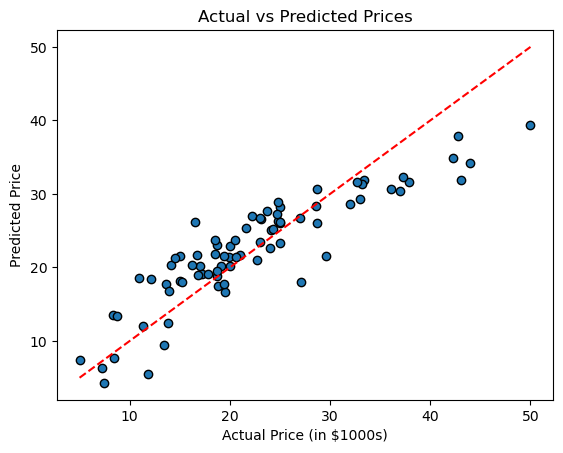

In [22]:
import matplotlib.pyplot as plt#used to plot basic graphs
plt.scatter(ytest, y_pred,edgecolors='k')#y_test means actual value and y_pred means values predicted by model
#edgecolors='k' means the border of each dot is colored black (k stands for black)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')#We are plotting best fit line here which is dotted and of red color
#the line starts from minimum value of y and goes till maximum value
plt.xlabel("Actual Price (in $1000s)")#Label for X axis
plt.ylabel("Predicted Price")#Label for y axis
plt.title("Actual vs Predicted Prices")#title of the plot
plt.show()#to display the plot

In [16]:
m=model.coef_
c=model.intercept_
print(m,c)#Here we have used multiple linear regression whose equation is y=m1x1+m2x2+c as we have more than one input 
#there are two inputs so there are two slope(m) values which are 4.9091342 and -0.61642437 and intercept(c) is
#-0.5335866111473351

[ 4.9091342  -0.61642437] -0.5335866111473351


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #sklearn.etric is used to import metrics
#which determine the accuracy of our model
mse = mean_squared_error(ytest, y_pred)#We are passing the y_test value means training data value of output and its 
#its predicted value y_pred to calculate mse
mae = mean_absolute_error(ytest, y_pred)#We are passing the y_test value means training data value of output and its 
#its predicted value y_pred to calculate mae
r2 = r2_score(ytest, y_pred)#We are passing the y_test value means training data value of output and its 
#its predicted value y_pred to calculate r2 socre

In [18]:
print("Mean Squared Error :", mse)#printing the mse 
print("Mean Absolute Error:", mae)#printing mae
print("R2 Score            :",r2)#printing r2 score

#We know that error=actual value(y_test)-my model predicted value(y_pred) 

#So in MAE(Mean Absolute Error)we calculate the summation of all errors and we take absolute value of that 
#so that negative value is also positive.The formula of MAE is 1/n summation(i=1 to n)|y-y'| where y is the actual value
#(y_test) and y' is predicted value(y_pred) and n is the n is no.of data point(means no.of rows in training dataset)

#So in MSE(Mean Squared Error)we calculate the summation of all errors.The formula of MAE is 1/n summation(i=1 to n)(y-y')^2 where y is the actual value
#(y_test) and y' is predicted value(y_pred) and n is the n is no.of data point(means no.of rows in training dataset).The
#only difference is that in MAE we were taking absolute value but here in MSE we are taking the square of the error

#R2 score tells that how close are the data points from the best fit line
#The formula is (y-y bar)^2/(y_predicted - y bar)^2 where y is actual values means y_test,y bar is the mean of y_test(means
#we will do summation of all y values  and divide by total number of values to get the mean(y bar)) and y predicted
#is the predicted values(y_pred).It gives result between 0 and 1 

#Here we see that R2 score is 0.5099 means 50.99% which is not good we should have more number of rows in our data 
#Due to small dataset our model acccuracy is not good

#If we want to increase our accuracy of the model with this dataset only change the value of random state from zero to any 
#bigger number like 40,42,70 etc I found that when I change random state to 100 instead of zero my model accuracy reached 
#78% which is much better

#Here means random state=0 was taking different values for training and testing dataset as compared to random_state=100
#means that random state is taking better values in its training and testing dataset
#So for every random state number the training data will be 80% and testing as 20% as written above but the values
#taken for training and testing dataset changes for every random_state number so we have to check which is the better 
#number for random state 
#Remember that random state can have values like 1000,5000 etc as well no issue its not only between 0 and 100

Mean Squared Error : 19.15276298599664
Mean Absolute Error: 3.5020311108090616
R2 Score            : 0.7814708590642968


In [20]:
features=np.array([[6,19]])#giving input to our model
prediction=model.predict(features)

In [21]:
print(f"Predicted house Price for rm,lstat {features} user input is :",prediction)

Predicted house Price for rm,lstat [[ 6 19]] user input is : [17.20915547]
